In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)
from dezero import Variable
import dezero.functions as F

## Step29

In [3]:
def rosenbrock(x0, x1):
    y = 100*(x1 - x0 ** 2)**2 + (x0 - 1) ** 2
    return y

In [4]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
x0.grad, x1.grad

(variable(-2.0), variable(400.0))

AttributeError: 'Variable' object has no attribute 'item'

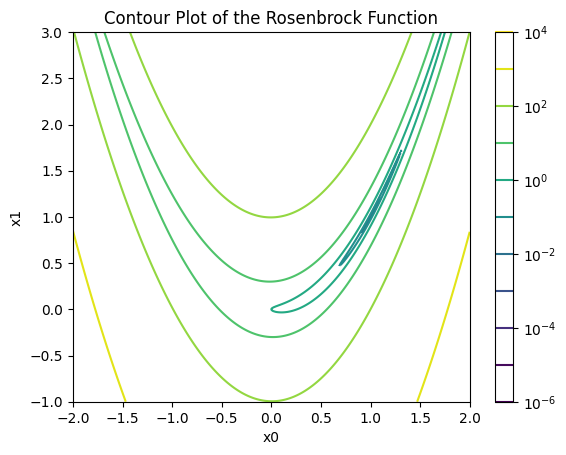

In [5]:
x = np.linspace(-2, 2 ,400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

contour = plt.contour(X, Y, Z, levels=100, cmap='viridis', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.title('Contour Plot of the Rosenbrock Function')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar(contour)

lr = 0.001
x0, x1 = (Variable(np.array(0.0)), Variable(np.array(2.0)))
xx0 = [x0.data.item()]
xx1 = [x1.data.item()]

for i in range(10000):
    y = rosenbrock(x0, x1)
    x0.clear_grad()
    x1.clear_grad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad
    xx0.append(x0.data.item())
    xx1.append(x1.data.item())

plt.plot(xx0,xx1, "-or", alpha=0.5)



0 variable(2.0)


AttributeError: 'Variable' object has no attribute 'item'

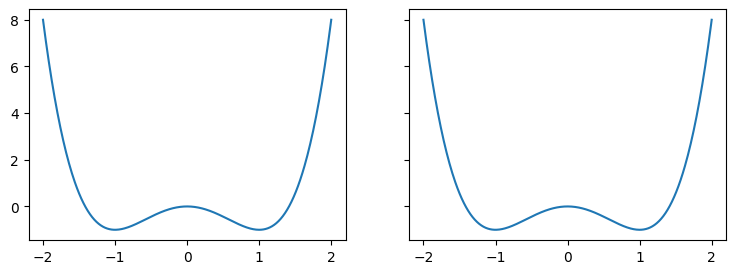

In [7]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

def newton(x0, x1, iters):
    res = [[x0.data.item(), x1.data.item()]]
    for i in range(iters):
        print(i, x0)  
        y = f(x0)
        x0.clear_grad()
        y.backward()
        x0.data -= x0.grad / gx2(x0.data)
        res.append([x0.data.item(), y.data.item()])
    
    return res

def sdg(x0, x1, iters, lr=0.001):
    res = [[x0.data.item(), x1.data.item()]]
    for i in range(iters):
        print(i, x0)
        y = f(x0)
        x0.clear_grad()
        y.backward()
        x0.data -= lr*x0.grad
        res.append([x0.data.item(), y.data.item()])
    
    return res
        
x = np.linspace(-2, 2 ,400)
y = f(x)

flg, ax = plt.subplots(1, 2, figsize=(9,3), sharey=True)
ax[0].plot(x, y)
ax[1].plot(x, y)

x0 = Variable(np.array(2.0))
x1 = Variable(np.array(8.0))

p0 = newton(x0, x1, 1000)
p0 = np.array(p0)
ax[0].plot(p0[:,0], p0[:,1], "-or")
ax[0].set_title('Newton')

p1 = sdg(x0, x1, 1000)
p1 = np.array(p1)
ax[1].plot(p1[:,0], p1[:,1], 'ob')
ax[1].set_title('sgd')

plt.show()


## Step33

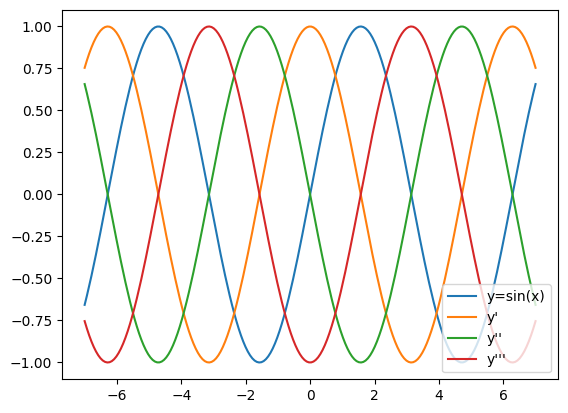

In [8]:
x = Variable(np.linspace(-7,7,200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data.flatten()]
trial = 3
for i in range(trial):
    logs.append(x.grad.data.flatten())
    gx = x.grad
    x.clear_grad()
    gx.backward(create_graph=True)

labels = ['y=sin(x)', "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
    
plt.legend(loc='lower right')
plt.show()

3778.3434332887323


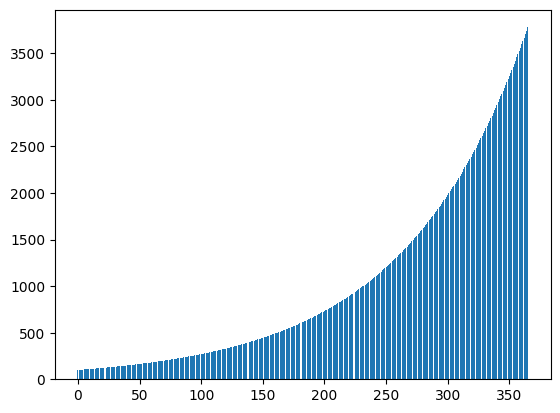

In [9]:
origin = 100
rate = 0.01
term = 365
sum = []
sum.append(origin)

for i in range(term):
    origin = origin * (1 + rate)
    sum.append(origin)

plt.bar(np.arange(term + 1),sum)
print(sum[-1])
plt.show()


$y = Wx + b$ \
$W = np.random.rand(100,1)$\
$b = 5$

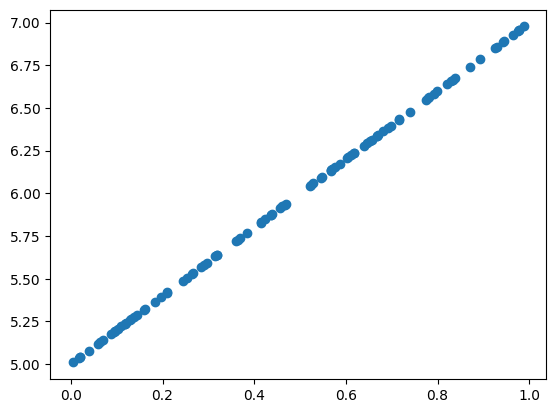

In [4]:
np.random.seed(0)
x = np.random.rand(100, 1)
b = 5
y = 2 * x + 5 # 
plt.scatter(x, y)
plt.show()

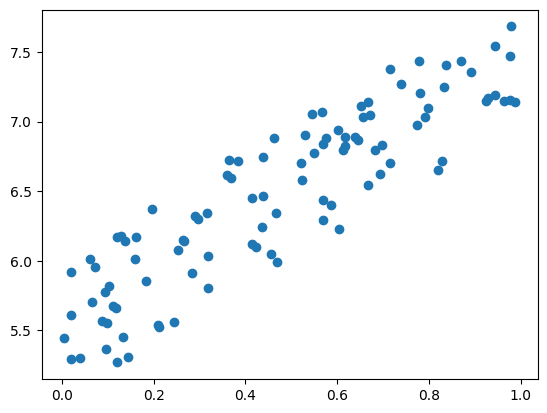

In [30]:
np.random.seed(0)
x = np.random.rand(100, 1)
W = np.random.rand(100, 1)
b = 5
y = 2 * x + 5 + W # 
plt.scatter(x, y)
plt.show()

In [5]:
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

w = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

In [7]:
def predict(x):
    y = F.matmul(x, w) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    w.clear_grad()
    b.clear_grad()
    loss.backward()
    
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data
    print(w, b, loss)

variable([[2.15502468]]) variable([5.41814454]) variable(0.0963119881347557)
variable([[2.15159587]]) variable([5.42006889]) variable(0.09615460679140046)
variable([[2.14820757]]) variable([5.42197051]) variable(0.09600092165569105)
variable([[2.14485929]]) variable([5.42384966]) variable(0.09585084591968265)
variable([[2.14155056]]) variable([5.42570661]) variable(0.09570429481417396)
variable([[2.13828092]]) variable([5.42754163]) variable(0.0955611855608259)
variable([[2.1350499]]) variable([5.42935498]) variable(0.09542143732540496)
variable([[2.13185705]]) variable([5.4311469]) variable(0.0952849711721243)
variable([[2.12870192]]) variable([5.43291766]) variable(0.09515171001905774)
variable([[2.12558405]]) variable([5.4346675]) variable(0.09502157859460031)
variable([[2.12250302]]) variable([5.43639666]) variable(0.09489450339495187)
variable([[2.11945838]]) variable([5.43810541]) variable(0.09477041264259883)
variable([[2.1164497]]) variable([5.43979396]) variable(0.094649236245

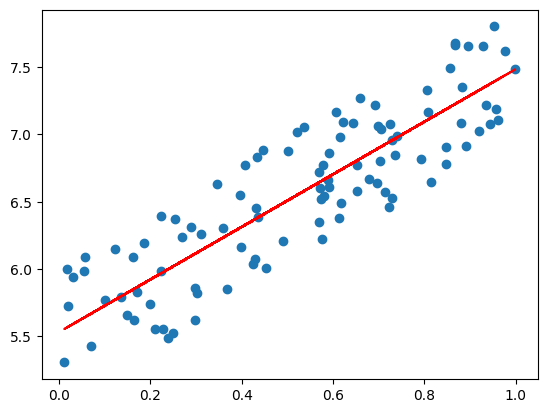

In [9]:
plt.scatter(x.data, y.data)
plt.plot(x.data, (x * w + b).data, color='r')
plt.show()